In [35]:
# Initial imports
import pandas as pd
import hvplot.pandas
import numpy as np
from pathlib import Path
import plotly.express as px
import holoviews as hv
%matplotlib inline

In [4]:
#Import data
# set the file path
file_path = Path("Data/LA_CPI_apparel.csv")
file_path_2= Path("Data/LA_CPI_foodaway.csv")
file_path_3= Path("Data/LA_CPI_housing.csv")

# create a Pandas dataframe from a csv file
apparel_df = pd.read_csv(file_path, index_col='Year')
foodaway_df = pd.read_csv(file_path_2, index_col='Year')
housing_df = pd.read_csv(file_path_3, index_col='Year')
housing_df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual,HALF1,HALF2
Year,,,,,,,,,,,,,,,
2012,288.915,289.660,290.936,291.511,292.280,292.729,293.165,293.548,293.979,294.332,294.580,295.019,292.554,291.005,294.104
2013,295.013,295.468,295.811,296.433,297.487,297.973,298.280,298.911,299.477,299.905,300.434,300.730,297.994,296.364,299.623
2014,301.367,302.079,301.907,302.351,302.717,303.586,304.888,305.757,306.388,307.260,308.346,308.746,304.616,302.335,306.898
2015,309.380,310.319,311.712,312.195,313.094,314.217,315.232,316.270,316.513,317.756,318.482,320.054,314.602,311.820,317.385
2016,321.164,322.208,323.991,324.650,326.181,327.527,329.324,330.770,331.974,332.895,334.464,335.713,328.405,324.287,332.523
2017,337.578,338.948,339.298,340.053,340.212,341.127,343.367,345.138,346.393,347.782,349.168,350.535,343.300,339.536,347.064
2018,352.105,353.312,355.088,357.704,358.720,360.256,361.275,362.689,364.472,365.422,366.553,367.809,360.450,356.198,364.703
2019,369.273,371.721,373.243,375.044,375.847,378.219,379.309,380.646,381.810,382.502,383.988,384.936,378.045,373.891,382.199
2020,385.716,386.791,387.550,389.549,390.454,391.436,391.998,392.106,391.975,391.950,390.986,391.023,390.128,388.583,391.673


In [5]:
#Select Annual Data for each dataframe
apparel_df = apparel_df['Annual']
foodaway_df = foodaway_df['Annual']
housing_df = housing_df['Annual']


In [6]:
#Concatenate the dataframes from 2012-2021

combined_df = pd.concat([apparel_df, foodaway_df, housing_df], axis='columns', join='inner')
combined_df


,Annual,Annual,Annual
Year,,,
2012,113.558,220.626,292.554
2013,111.437,222.293,297.994
2014,112.860,228.346,304.616
2015,109.845,234.689,314.602
2016,111.096,243.517,328.405
2017,106.918,252.992,343.300
2018,109.141,262.108,360.450
2019,108.453,275.222,378.045
2020,108.200,289.773,390.128


In [7]:

#Assign the column names
combined_df.columns=["LA Apparel CPI", "LA Food Away from home CPI", "LA Housing CPI"]
combined_df

,LA Apparel CPI,LA Food Away from home CPI,LA Housing CPI
Year,,,
2012,113.558,220.626,292.554
2013,111.437,222.293,297.994
2014,112.860,228.346,304.616
2015,109.845,234.689,314.602
2016,111.096,243.517,328.405
2017,106.918,252.992,343.300
2018,109.141,262.108,360.450
2019,108.453,275.222,378.045
2020,108.200,289.773,390.128


In [8]:
#Store combined dataframe to csv
combined_df.to_csv("Data/LA_combined_cpi.csv")

In [9]:
#Calculate the year over year percent change in CPI for each
annual_change = combined_df.pct_change()
annual_change= annual_change.drop([2012, 2013, 2014])
annual_change


,LA Apparel CPI,LA Food Away from home CPI,LA Housing CPI
Year,,,
2015,-0.026715,0.027778,0.032782
2016,0.011389,0.037616,0.043874
2017,-0.037607,0.038909,0.045356
2018,0.020792,0.036033,0.049956
2019,-0.006304,0.050033,0.048814
2020,-0.002333,0.052870,0.031962
2021,0.017246,0.044669,0.012181


<AxesSubplot:title={'center':'CPI Year over Year percent change in LA'}, xlabel='Year', ylabel='YoY percent change'>

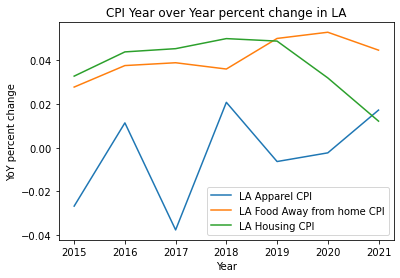

In [10]:
annual_change.plot(title="CPI Year over Year percent change in LA", ylabel= "YoY percent change")

<AxesSubplot:xlabel='Year'>

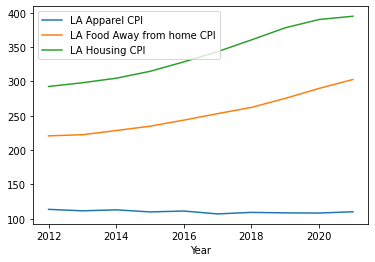

In [11]:
combined_df.plot()

In [12]:
# Get stock data for comparisons with CPI
#import api libraries and dependencies
import alpaca_trade_api as tradeapi
from alpaca_trade_api.rest import REST, TimeFrame
import os
# Load .env environment variables
from dotenv import load_dotenv
load_dotenv()

True

In [13]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)
type(alpaca_api_key)

str

In [14]:
#Format current date as ISO format
start = pd.Timestamp("2012-01-01", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-12-31", tz="America/New_York").isoformat()
timeframe="1Day"

In [15]:
#Fetch stock data for each industry of interest
real_estate = ["TSCO","DHI","LOW","LGIH"]
apparel = ["NKE", "UA","GPS", "LULU", "JWN"]
food_away = ["MCD","YUM", "DRI", "QSR"]

def alpacas_api(symbols,timeframe, start,end):
    dataframe = alpaca.get_bars(symbols, timeframe=timeframe, start=start, end=end).df
    new_df = dataframe[['open','close','trade_count', 'symbol']]

    return new_df

Real_Estate_stocks = alpacas_api(real_estate, timeframe,start,end)
Apparel_stocks = alpacas_api(apparel, timeframe,start,end)
Food_stocks = alpacas_api(food_away, timeframe,start,end)

In [16]:
# Create pivot tables for closing prices for each stock df
Real_Estate_close = Real_Estate_stocks.pivot_table(values="close", index="timestamp",columns="symbol")
Apparel_close = Apparel_stocks.pivot_table(values="close", index="timestamp",columns="symbol")
Food_close = Food_stocks.pivot_table(values="close", index="timestamp",columns="symbol")
Food_close

symbol,DRI,MCD,QSR,YUM
timestamp,,,,
2015-12-01 05:00:00+00:00,56.72,114.45,36.57,74.48
2015-12-02 05:00:00+00:00,56.30,113.72,36.48,74.95
2015-12-03 05:00:00+00:00,55.20,113.39,35.88,73.13
2015-12-04 05:00:00+00:00,57.43,116.20,36.01,76.14
2015-12-07 05:00:00+00:00,58.92,116.42,35.48,76.41
...,...,...,...,...
2021-12-27 05:00:00+00:00,150.23,268.24,60.08,138.01
2021-12-28 05:00:00+00:00,149.37,267.88,60.21,137.98
2021-12-29 05:00:00+00:00,149.02,268.49,60.39,138.66


In [17]:
#Calculate annual percentage change for each stock dataframe
# use resample to get annual data instead of daily
Real_Estate_stocks = Real_Estate_stocks.resample("Y").mean()
Real_estate_stock_annual = Real_Estate_stocks["close"].pct_change()
Real_estate_stock_annual.index = Real_estate_stock_annual.index.year
Real_estate_stock_annual

Apparel_stocks= Apparel_stocks.resample("Y").mean()
Apparel_stocks_annual= Apparel_stocks["close"].pct_change()
Apparel_stocks_annual.index = Apparel_stocks_annual.index.year

Food_stocks = Food_stocks.resample("Y").mean()
Food_stocks_annual = Food_stocks["close"].pct_change()
Food_stocks_annual.index = Food_stocks_annual.index.year
Apparel_stocks_annual

timestamp
2015         NaN
2016   -0.258470
2017   -0.158061
2018    0.409166
2019    0.194464
2020    0.292062
2021    0.349756
Name: close, dtype: float64

In [18]:
#Fetch percent change for each CPI measure
apparel_pct_change = annual_change["LA Apparel CPI"]
Food_pct_change = annual_change["LA Food Away from home CPI"]
Housing_pct_change = annual_change[ "LA Housing CPI"]
Housing_pct_change.dropna()


Year
2015    0.032782
2016    0.043874
2017    0.045356
2018    0.049956
2019    0.048814
2020    0.031962
2021    0.012181
Name: LA Housing CPI, dtype: float64

In [19]:
#Create a function to concat CPI data and stock data
def concat_stocks_cpi(stock, cpi):
    df = pd.concat([stock,cpi], axis=1, join="inner")
    return df 

In [20]:
#Combine housing CPI and housing stocks
Housing_combined = concat_stocks_cpi(Real_estate_stock_annual, Housing_pct_change)
Housing_combined.columns = ['Real Estate stocks', "LA housing CPI"]
Housing_plot= Housing_combined.hvplot.line(xlabel="Year", ylabel="Annual Percent Change", title="LA Housing CPI and Real Estate Stocks annual percent change")
Housing_plot

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [21]:
#Combine and plot Apparel CPI and stock data
Apparel_combined = concat_stocks_cpi(Apparel_stocks_annual, apparel_pct_change)
Apparel_combined.columns = ['Apparel stocks', "LA Apparel CPI"]
Apparel_plot= Apparel_combined.hvplot.line(xlabel="Year", ylabel="Annual Percent Change", title="LA Apparel CPI and Apparel stocks percent changes over time", rot=90)
Apparel_plot



:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [22]:
#Combine and plot Food away from home CPI and stock data
Food_combined = concat_stocks_cpi(Food_stocks_annual, Food_pct_change)
Food_combined.columns = ['Food stocks', "LA Food Away from home CPI"]
Food_plot=Food_combined.hvplot.line(xlabel="Year", ylabel= "Annual Percent change", title="LA Food away home CPI percent change vs Food Stocks percent change", rot=90, ylim=(-0.2, 0.3), yticks=0.1, height=500)
Food_plot


:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [23]:
#What is the relationship between the CPI percent change and real estate stocks?
covariance= Housing_pct_change.cov(Real_estate_stock_annual)
covariance2= Food_pct_change.cov(Food_stocks_annual)
covariance2

-0.0002962257453757828

In [24]:
# Question 1. For each industry, during the biggest increase and decrease in CPI, what was the stock market trend?
def extract_max(df):
    return df[df.iloc[:, 1] == df.iloc[:, 1].max()]

def extract_min(df):
     return df[df.iloc[:, 1] == df.iloc[:, 1].min()]

def graph_max(df):
    bar = extract_max(df)
    graph = bar.plot.bar(ylabel="Percentage change", xlabel="Year", title="CPI Highest year and corresponding stock data")
    return graph

def graph_min(df):
    bar = extract_min(df)
    graph = bar.plot.bar(ylabel="Percentage change", xlabel="Year", title="CPI Lowest year and corresponding stock data")
    return graph

<AxesSubplot:title={'center':'CPI Highest year and corresponding stock data'}, xlabel='Year', ylabel='Percentage change'>

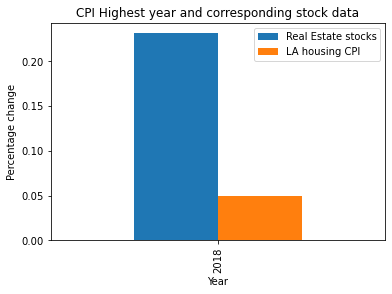

In [25]:
graph_max(Housing_combined)

<AxesSubplot:title={'center':'CPI Highest year and corresponding stock data'}, xlabel='Year', ylabel='Percentage change'>

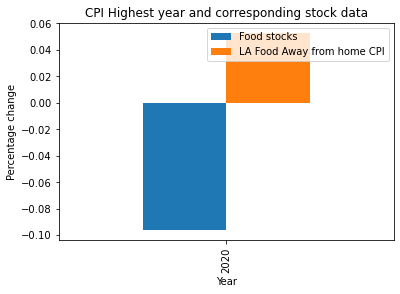

In [26]:
graph_max(Food_combined)

<AxesSubplot:title={'center':'CPI Highest year and corresponding stock data'}, xlabel='Year', ylabel='Percentage change'>

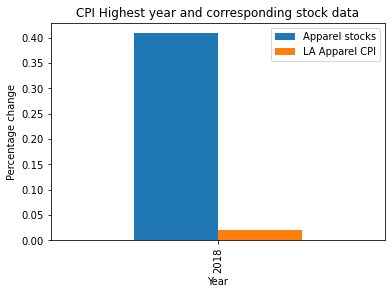

In [27]:
graph_max(Apparel_combined)

In [28]:
#Qn 2. Which city has the largest rate of inflation for each industry?
#Import Philly and Seattle data
# set the file paths
file_path_4 = Path("Philly_combined_CPI.csv")
file_path_5= Path("seattle_data/seattle_cpi_data.csv")


# create a Pandas dataframe from a csv file
combined_philly_df = pd.read_csv(file_path_4, index_col='Year').dropna()
combined_seattle_df = pd.read_csv(file_path_5, index_col='Year').dropna()

#concatenate all 3 city CPI dataframes
combined_cities_cpi= pd.concat([combined_philly_df, combined_seattle_df, combined_df], axis="columns", join="inner")
combined_cities_cpi

,PHL Apparel Annual,PHL Commercial Food Annual,PHL Housing Annual,Seattle Apparel CPI,Seattle Food Away from Home CPI,Seattle Rental Equivalent CPI,LA Apparel CPI,LA Food Away from home CPI,LA Housing CPI
Year,,,,,,,,,
2012,112.280,198.335,299.124,136.170,259.603,283.351,113.558,220.626,292.554
2013,112.633,203.147,302.356,133.148,266.493,291.631,111.437,222.293,297.994
2014,112.205,208.462,309.193,130.279,271.982,305.272,112.860,228.346,304.616
2015,107.425,211.667,316.315,129.292,278.738,320.433,109.845,234.689,314.602
2016,110.940,215.071,320.564,130.264,287.958,339.302,111.096,243.517,328.405
2017,111.743,219.145,326.389,130.814,296.622,360.153,106.918,252.992,343.300
2018,110.423,222.673,331.801,127.582,305.532,382.350,109.141,262.108,360.450
2019,106.646,228.602,341.424,128.442,314.927,400.300,108.453,275.222,378.045
2020,104.952,238.666,350.596,124.045,329.670,414.762,108.200,289.773,390.128


In [29]:
combined_cpi_change=combined_cities_cpi.pct_change().dropna()
combined_cpi_change


,PHL Apparel Annual,PHL Commercial Food Annual,PHL Housing Annual,Seattle Apparel CPI,Seattle Food Away from Home CPI,Seattle Rental Equivalent CPI,LA Apparel CPI,LA Food Away from home CPI,LA Housing CPI
Year,,,,,,,,,
2013,0.003144,0.024262,0.010805,-0.022193,0.026541,0.029222,-0.018678,0.007556,0.018595
2014,-0.003800,0.026163,0.022612,-0.021547,0.020597,0.046775,0.012770,0.027230,0.022222
2015,-0.042601,0.015375,0.023034,-0.007576,0.024840,0.049664,-0.026715,0.027778,0.032782
2016,0.032721,0.016082,0.013433,0.007518,0.033078,0.058886,0.011389,0.037616,0.043874
2017,0.007238,0.018943,0.018171,0.004222,0.030088,0.061453,-0.037607,0.038909,0.045356
2018,-0.011813,0.016099,0.016581,-0.024707,0.030038,0.061632,0.020792,0.036033,0.049956
2019,-0.034205,0.026626,0.029002,0.006741,0.030750,0.046947,-0.006304,0.050033,0.048814
2020,-0.015884,0.044024,0.026864,-0.034233,0.046814,0.036128,-0.002333,0.052870,0.031962
2021,0.033091,0.037647,0.014093,0.037188,0.065399,0.013152,0.017246,0.044669,0.012181


In [30]:
#Fetch CPI data by industry 
combined_apparel_cpi= combined_cpi_change[["PHL Apparel Annual", "Seattle Apparel CPI", "LA Apparel CPI"]]
combined_food_cpi = combined_cpi_change[["PHL Commercial Food Annual", "Seattle Food Away from Home CPI", "LA Food Away from home CPI"]]
combined_housing_cpi = combined_cpi_change[["PHL Housing Annual", "Seattle Rental Equivalent CPI", "LA Housing CPI" ]]
combined_housing_cpi

,PHL Housing Annual,Seattle Rental Equivalent CPI,LA Housing CPI
Year,,,
2013,0.010805,0.029222,0.018595
2014,0.022612,0.046775,0.022222
2015,0.023034,0.049664,0.032782
2016,0.013433,0.058886,0.043874
2017,0.018171,0.061453,0.045356
2018,0.016581,0.061632,0.049956
2019,0.029002,0.046947,0.048814
2020,0.026864,0.036128,0.031962
2021,0.014093,0.013152,0.012181


In [31]:
housing_combined_plot= combined_housing_cpi.hvplot.line(x="Year", ylabel="Annual percent change", title="Housing YoY changes in LA, PHL, and Seattle")
housing_combined_plot

:NdOverlay   [Variable]
   :Curve   [Year]   (value)

In [32]:
apparel_combined_plot= combined_apparel_cpi.hvplot.line(xlabel="Year", ylabel="Annual percent change", title="Apparel YoY changes in LA, PHL, and Seattle")
apparel_combined_plot

:NdOverlay   [Variable]
   :Curve   [Year]   (value)

In [33]:
food_combined_plot= combined_food_cpi.hvplot.line(xlabel="Year", ylabel="Annual percent change", title="Food away from Home YoY changes in LA, PHL, and Seattle")
food_combined_plot

:NdOverlay   [Variable]
   :Curve   [Year]   (value)

In [38]:

# Question 3, relationship between trade count and high periods of inflation

def reformat_data_trade_count(dataframe):
    dataframe = dataframe.resample("Y").mean()

    dataframe = dataframe["trade_count"]
    dataframe.index =dataframe.index.year
    return dataframe

def combine_cpi_trade_count(df_stocks, df_cpi):
    reformed = reformat_data_trade_count(df_stocks)
    trade = concat_stocks_cpi(reformed, df_cpi)
    return trade

def graph_max_trade_count(df_stocks, df_cpi,column_name):
    data = combine_cpi_trade_count(df_stocks,df_cpi).sort_values(by=f"{column_name}")
    highest_inflation = data.iloc[-3:]
    plot = highest_inflation.hvplot.scatter(x=f"{column_name}", y="trade_count",xlabel="CPI percent change", ylabel= "Trade Count", title="Trade Count During High Periods of Inflation", legend="top_left")
    return plot

real_estate_scatter = graph_max_trade_count(Real_Estate_stocks, Housing_pct_change, "LA Housing CPI")
food_scatter = graph_max_trade_count(Food_stocks, Food_pct_change, "LA Food Away from home CPI")
apparel_scatter = graph_max_trade_count(Apparel_stocks, apparel_pct_change, "LA Apparel CPI")

combined_scatter = hv.NdOverlay({'Housing': real_estate_scatter, 'Commercial Food': food_scatter, 'Apparel':apparel_scatter})
combined_scatter


:NdOverlay   [Element]
   :Scatter   [LA Housing CPI]   (trade_count)